In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv('train.csv',usecols=['GarageQual','FireplaceQu','SalePrice'])

In [3]:
df['GarageQual'].value_counts()

GarageQual
TA    1311
Fa      48
Gd      14
Ex       3
Po       3
Name: count, dtype: int64

In [4]:
df['FireplaceQu'].value_counts()

FireplaceQu
Gd    380
TA    313
Fa     33
Ex     24
Po     20
Name: count, dtype: int64

In [5]:
df.isnull().mean()*100

FireplaceQu    47.260274
GarageQual      5.547945
SalePrice       0.000000
dtype: float64

In [6]:
def CheckPlot(col):
    # add col with mode filling missing values
    mode = df[col].mode()[0]
    df[f"{col}_mode"] = df[col]
    df[f"{col}_mode"].fillna(mode,inplace=True)

    # all unique values in columns
    columnValues = [i for i in df[f"{col}_mode"].unique()]
    plt.figure(figsize=(14,4))
    print(columnValues)
    
    # plot original 
    ax1 = plt.subplot(121)
    plt.title(f"Original {col}")
    for i in columnValues:
        df[df[col] == i]['SalePrice'].plot(kind='kde',ax=ax1)
        
    lines, labels = ax1.get_legend_handles_labels()
    labels = columnValues
    ax1.legend(lines, labels, loc='best')

    # plot Imputed 
    plt.title(f"Imputed {col}")
    ax2 = plt.subplot(122)
    for i in columnValues:
        df[df[f"{col}_mode"] == i]['SalePrice'].plot(kind='kde',ax=ax2)

    lines, labels = ax2.get_legend_handles_labels()
    labels = columnValues
    ax2.legend(lines, labels, loc='best')
    
    plt.show()
    
    


C:\Users\aashi\AppData\Local\Temp\ipykernel_2104\3272540.py:5: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df[f"{col}_mode"].fillna(mode,inplace=True)


['TA', 'Fa', 'Gd', 'Ex', 'Po']


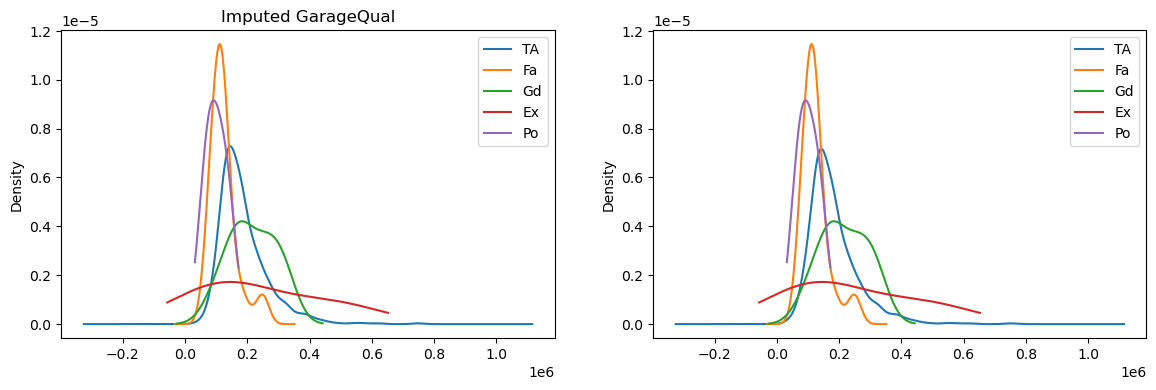

In [7]:
CheckPlot('GarageQual')

In [8]:
def CheckPlothist(col):
    # add col with mode filling missing values
    mode = df[col].mode()[0]
    df[f"{col}_mode"] = df[col]
    df[f"{col}_mode"].fillna(mode,inplace=True)

    # all unique values in columns
    plt.figure(figsize=(14,4))
    
    # plot original 
    ax1 = plt.subplot(121)
    plt.title(f"Original {col}")
    df[col].hist(ax=ax1)

    # plot Imputed 
    plt.title(f"Imputed {col}")
    ax2 = plt.subplot(122)
    df[f"{col}_mode"].hist(ax=ax2)
    
    plt.show()
    

C:\Users\aashi\AppData\Local\Temp\ipykernel_2104\4205678192.py:5: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df[f"{col}_mode"].fillna(mode,inplace=True)


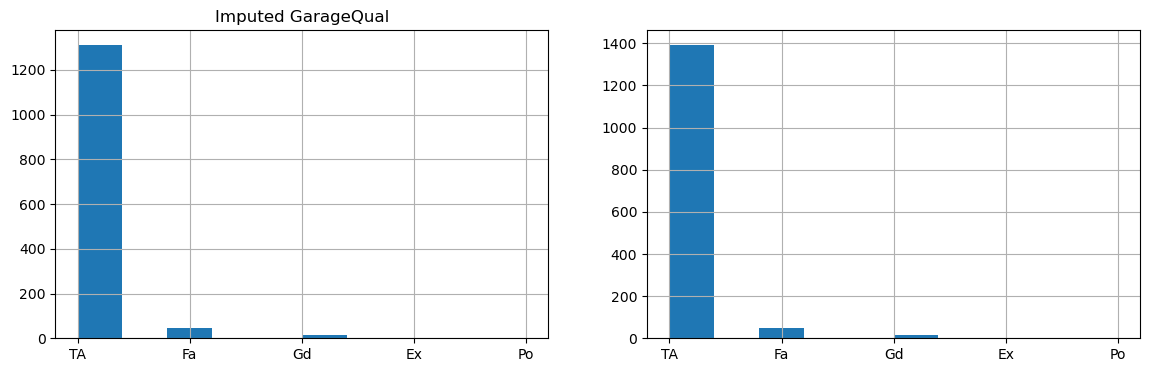

In [10]:
CheckPlothist('GarageQual')

In [16]:
def CheckPlot(col,value):
    # add col with mode filling missing values
    mode = df[col].mode()[0]
    df[f"{col}_mode"] = df[col]
    df[f"{col}_mode"].fillna(mode,inplace=True)

    # all unique values in columns
    plt.figure(figsize=(14,4))
    
    # plot original 
    ax1 = plt.subplot(111)
    plt.title(f"Original {col}")
    df[df[col] == value]['SalePrice'].plot(kind='kde',ax=ax1)
    df[df[f"{col}_mode"] == value]['SalePrice'].plot(kind='kde',ax=ax1,color='red')
        
    lines, labels = ax1.get_legend_handles_labels()
    labels = ['Orignal','Imputed']
    ax1.legend(lines, labels, loc='best')
    
    plt.show()

C:\Users\aashi\AppData\Local\Temp\ipykernel_2104\3173886585.py:5: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df[f"{col}_mode"].fillna(mode,inplace=True)


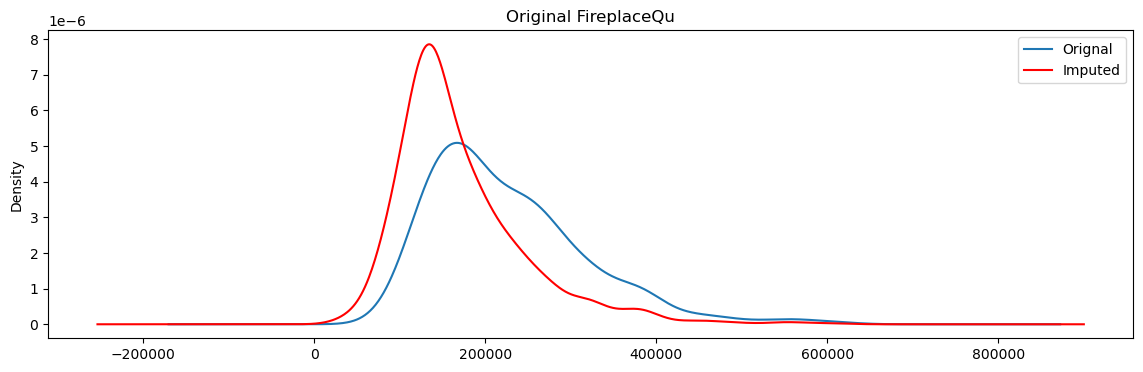

In [17]:
CheckPlot('FireplaceQu','Gd')

# using sklearn

In [19]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(df.drop(columns=['SalePrice']),df['SalePrice'],test_size=0.2)

In [20]:
from sklearn.impute import SimpleImputer

In [21]:
imputer = SimpleImputer(strategy='most_frequent')

In [24]:
X_train = imputer.fit_transform(X_train)
X_test = imputer.transform(X_train)

C:\Users\aashi\anaconda3\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but SimpleImputer was fitted with feature names
  warnings.warn(


In [26]:
imputer.statistics_

array(['Gd', 'TA', 'TA', 'Gd'], dtype=object)